<h2>2019-01-08 - 1998NU</h2>

In [103]:
import statistics as std
import pandas as pd                                 
import numpy as np                          #Importando os módulos necessários
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.time import Time
from astropy.io.fits import HDUList

<h4>Dados brutos</h4>

In [122]:
file = open('JAN/2019-01-08/logfile','r')                       #Abrindo o arquivo com os dados
raw_fwhm = []                                       #Lista vazia para salvar os valores do fwhm

for indice, linha in enumerate(file):            #Loop para ler as linhas apartir da 480 e pegar o fwhm
    if indice < 134:
        if linha[:47] == '  Average full width at half maximum (FWHM) of ': 
            raw_fwhm.append(float(linha[47:]))

In [120]:
rimage1 = fits.open('JAN/2019-01-08/1998NU_40s_b2x2-001_R.fit')
rimage2 = fits.open('JAN/2019-01-08/1998NU_40s_b2x2-051_R.fit')
rimage3 = fits.open('JAN/2019-01-08/1998NU_40s_b2x2-101_R.fit')
rimage4 = fits.open('JAN/2019-01-08/1998NU_40s_b2x2-151_R.fit')
rimage5 = fits.open('JAN/2019-01-08/1998NU_40s_b2x2-201_R.fit')
rimage6 = fits.open('JAN/2019-01-08/1998NU_40s_b2x2-251_R.fit')  #Abrindo as imagens (deve ter um outro jeito!)
rimage7 = fits.open('JAN/2019-01-08/1998NU_40s_b2x2-301_R.fit')
rimage8 = fits.open('JAN/2019-01-08/1998NU_40s_b2x2-351_R.fit')
rimage9 = fits.open('JAN/2019-01-08/1998NU_40s_b2x2-401_R.fit')
rimage10 = fits.open('JAN/2019-01-08/1998NU_40s_b2x2-501_R.fit')
rimage11 = fits.open('JAN/2019-01-08/1998NU_40s_b2x2-551_R.fit')
rimage12 = fits.open('JAN/2019-01-08/1998NU_40s_b2x2-565_R.fit')

r1dados = []

r1dados.append(rimage1[0].header['DATE-OBS'])
r1dados.append(rimage2[0].header['DATE-OBS'])
r1dados.append(rimage3[0].header['DATE-OBS'])
r1dados.append(rimage4[0].header['DATE-OBS'])
r1dados.append(rimage5[0].header['DATE-OBS'])
r1dados.append(rimage6[0].header['DATE-OBS'])     #Salvandoos as datas na lista (deve ter um outro jeito!)
r1dados.append(rimage7[0].header['DATE-OBS'])
r1dados.append(rimage8[0].header['DATE-OBS'])
r1dados.append(rimage9[0].header['DATE-OBS'])
r1dados.append(rimage10[0].header['DATE-OBS'])
r1dados.append(rimage11[0].header['DATE-OBS'])
r1dados.append(rimage12[0].header['DATE-OBS'])

r1times = Time(r1dados, format = 'isot', scale = 'utc')      #Instanciando a classe Time com os dados

it = ['2019-01-08T21:00:00']
itime = Time(it, format = 'isot', scale = 'utc' )

r1dt = []                                                   #Inicializando a lista com os pontos
r1t = np.empty(len(r1dados))                                 #Inicializando array para plotar

for i in range(len(r1dados)):
    r1dt.append(r1times[i] - itime)
    r1t[i] = (r1dt[i].value)*24                              #Calculando os valores de dt em HORAS

<h4>Dados calibrados</h4>

In [128]:
file = open('JAN/2019-01-08/logfile','r')                       #Abrindo o arquivo com os dados
calib_fwhm = []                                       #Lista vazia para salvar os valores do fwhm

for indice, linha in enumerate(file):            #Loop para ler as linhas apartir da 480 e pegar o fwhm
    if indice  > 134:
        if linha[:47] == '  Average full width at half maximum (FWHM) of ': 
            calib_fwhm.append(float(linha[47:]))  
        if linha[:39] == '  Full width at half maximum (FWHM) of ': 
            calib_fwhm.append(float(linha[39:]))  

In [125]:
c1image1 = fits.open('JAN/2019-01-08/1998NU_40s_b2x2-001_R_c.fit')
c1image2 = fits.open('JAN/2019-01-08/1998NU_40s_b2x2-051_R_c.fit')
c1image3 = fits.open('JAN/2019-01-08/1998NU_40s_b2x2-101_R_c.fit')
c1image4 = fits.open('JAN/2019-01-08/1998NU_40s_b2x2-151_R_c.fit')
c1image5 = fits.open('JAN/2019-01-08/1998NU_40s_b2x2-201_R_c.fit')
c1image6 = fits.open('JAN/2019-01-08/1998NU_40s_b2x2-251_R_c.fit')  #Abrindo as imagens (deve ter um outro jeito!)
c1image7 = fits.open('JAN/2019-01-08/1998NU_40s_b2x2-301_R_c.fit')
c1image8 = fits.open('JAN/2019-01-08/1998NU_40s_b2x2-351_R_c.fit')
c1image9 = fits.open('JAN/2019-01-08/1998NU_40s_b2x2-401_R_c.fit')
c1image10 = fits.open('JAN/2019-01-08/1998NU_40s_b2x2-501_R_c.fit')
c1image11 = fits.open('JAN/2019-01-08/1998NU_40s_b2x2-551_R_c.fit')
c1image12 = fits.open('JAN/2019-01-08/1998NU_40s_b2x2-565_R_c.fit')

c1dados = []

c1dados.append(c1image1[0].header['DATE-OBS'])
c1dados.append(c1image2[0].header['DATE-OBS'])
c1dados.append(c1image3[0].header['DATE-OBS'])
c1dados.append(c1image4[0].header['DATE-OBS'])
c1dados.append(c1image5[0].header['DATE-OBS'])
c1dados.append(c1image6[0].header['DATE-OBS'])     #Salvandoos as datas na lista (deve ter um outro jeito!)
c1dados.append(c1image7[0].header['DATE-OBS'])
c1dados.append(c1image8[0].header['DATE-OBS'])
c1dados.append(c1image9[0].header['DATE-OBS'])
c1dados.append(c1image10[0].header['DATE-OBS'])
c1dados.append(c1image11[0].header['DATE-OBS'])
c1dados.append(c1image12[0].header['DATE-OBS'])

c1times = Time(c1dados, format = 'isot', scale = 'utc')      #Instanciando a classe Time com os dados

it = ['2019-01-08T21:00:00']
itime = Time(it, format = 'isot', scale = 'utc' )

c1dt = []                                                   #Inicializando a lista com os pontos
c1t = np.empty(len(c1dados))                                 #Inicializando array para plotar

for i in range(len(c1dados)):
    c1dt.append(c1times[i] - itime)
    c1t[i] = (c1dt[i].value)*24                              #Calculando os valores de dt em HORAS

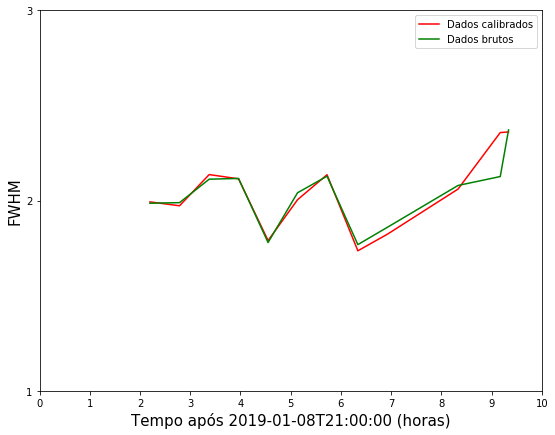

In [130]:
plt.figure(figsize=(9,7))
plt.plot(c1t, calib_fwhm, color = 'red', label = 'Dados calibrados')            #Calibrated
plt.plot(r1t, raw_fwhm, color = 'green', label  ='Dados brutos')                #Raw
plt.yticks(np.arange(1, 4, 1)) 
plt.xticks(np.arange(0, 11, 1)) 
plt.ylabel('FWHM', size = 15)
plt.xlabel('Tempo após 2019-01-08T21:00:00 (horas)', size = 15)
plt.legend()
plt.savefig('2019-01-08_plotfwhmxtime.png')
plt.show()

<h4>Estatística</h4>

In [111]:
mean_fwhm = std.mean(raw_fwhm)
median_fwhm = std.median(raw_fwhm)

print(mean_fwhm)
print(median_fwhm)

2.0486833333333334
2.0589
